# MOAI 2025 Training 

本題目是 MOAI 2025 的訓練題目

你將使用 PyTorch 來構建一個卷積神經網絡（CNN）模型，用於識別手寫數字，請按照以下步驟完成任務。

第一段代碼中的 TaskGrader 是一個評分器，請不要修改。可以點擊代碼塊中左側的深色部分將代碼摺疊。

In [1]:
# 此部分為評分器，請勿編輯此單元格

import torch
import pandas as pd


class TaskGrader:
    def __init__(self):
        self.q1_1_pass = False
        self.q1_2_pass = False
        self.q1_3_pass = False

        self.q2_1_pass = False
        self.q2_2_pass = False
        self.q2_3_pass = False
        self.q2_4_pass = False
        self.q2_5_pass = False

        self.q3_1_pass = False
        self.q3_2_pass = False

    def q1_1_check(self, images_raw, labels_raw):
        try:
            assert isinstance(images_raw, torch.Tensor), "圖片應該是 torch.Tensor 類型"
            assert images_raw.shape == (60000, 28, 28), f"圖片維度大小應該是 (60000, 28, 28)，現在是{images_raw.shape}"

            assert isinstance(labels_raw, pd.DataFrame), "標籤應該是 pandas DataFrame 類型"
            assert len(labels_raw) == 60000, f"標籤應該有 60000 行，現在是 {len(labels_raw)}"
        except AssertionError as e:
            print("Q1.1未通過:", str(e))
            return

        self.q1_1_pass = True
        print("Q1.1通過 (5分)")

    def q1_2_check(self, images, labels):
        try:
            assert isinstance(images, torch.Tensor), "歸一化後的圖像必須是 torch.Tensor 類型"
            assert isinstance(labels, torch.Tensor), "標籤必須是 torch.Tensor 類型"

            assert -0.1 < images.mean() < 0.1, f"歸一化圖像的均值應接近0，現在是{images.mean()}"
            assert 0.9 < images.std() < 1.1, f"歸一化圖像的標準差應接近1，現在是{images.std()}"
        except AssertionError as e:
            print("Q1.2未通過:", str(e))
            return

        self.q1_2_pass = True
        print("Q1.2通過 (5分)")

    def q1_3_check(self, train_dataset, val_dataset):
        try:
            total_size = len(train_dataset) + len(val_dataset)
            train_ratio = len(train_dataset) / total_size

            assert 0.79 <= train_ratio <= 0.81, f"訓練-驗證集分割應為8:2，現在是{train_ratio:.2f}:{1 - train_ratio:.2f}"
        except AssertionError as e:
            print("Q1.3未通過:", str(e))
            return

        self.q1_3_pass = True
        print("Q1.3通過 (5分)")

    def q2_check(self, model):
        try:
            for name, module in model.named_modules():
                if isinstance(module, torch.nn.Conv2d):
                    self.q2_1_pass = True
                elif isinstance(module, torch.nn.MaxPool2d):
                    self.q2_2_pass = True
                elif any(
                    isinstance(module, act)
                    for act in [
                        torch.nn.ReLU,
                        torch.nn.Sigmoid,
                        torch.nn.Tanh,
                        torch.nn.ELU,
                        torch.nn.LeakyReLU,
                        torch.nn.PReLU,
                    ]
                ):
                    self.q2_3_pass = True
                elif isinstance(module, torch.nn.Linear):
                    if module.out_features == 10:
                        self.q2_4_pass = True

            x = torch.randn(1, 28, 28).to(next(model.parameters()).device)
            output = model(x)
            if output.shape[1] == 10:
                self.q2_5_pass = True

        except Exception:
            pass

        checks = [
            (self.q2_1_pass, "Q2.1", "模型應包含卷積層", 2),
            (self.q2_2_pass, "Q2.2", "模型應包含池化層", 2),
            (self.q2_3_pass, "Q2.3", "模型應包含激活函數", 2),
            (self.q2_4_pass, "Q2.4", "模型應包含輸出層", 2),
            (self.q2_5_pass, "Q2.5", "未能成功定義前向傳播，輸出分類結果", 7),
        ]

        for check in checks:
            if not check[0]:
                print(f"{check[1]}未通過: {check[2]}")
            else:
                print(f"{check[1]}通過 ({check[3]}分)")

    def q3_1_check(self, criterion, optimizer):
        try:
            valid_loss_fns = [
                torch.nn.CrossEntropyLoss,
                torch.nn.NLLLoss,
                torch.nn.MSELoss,
                torch.nn.L1Loss,
                torch.nn.SmoothL1Loss,
                torch.nn.HuberLoss,
                torch.nn.SoftMarginLoss,
                torch.nn.MultiLabelMarginLoss,
                torch.nn.MultiLabelSoftMarginLoss,
            ]

            valid_optimizers = [
                torch.optim.SGD,
                torch.optim.Adam,
                torch.optim.RMSprop,
                torch.optim.Adagrad,
                torch.optim.Adadelta,
                torch.optim.Adamax,
                torch.optim.AdamW,
                torch.optim.SparseAdam,
                torch.optim.ASGD,
                torch.optim.Rprop,
                torch.optim.LBFGS,
                torch.optim.NAdam,
            ]

            is_valid_loss = any(isinstance(criterion, loss_fn) for loss_fn in valid_loss_fns)
            is_valid_optimizer = any(isinstance(optimizer, opt) for opt in valid_optimizers)

            assert is_valid_loss, "必須使用有效的損失函數 (CrossEntropyLoss, NLLLoss, MSELoss 等)"
            assert is_valid_optimizer, "必須使用有效的優化器 (SGD, Adam, RMSprop 等)"

        except Exception as e:
            print("Q3.1未通過:", str(e))
            return

        self.q3_1_pass = True
        print("Q3.1通過 (5分)")

    def q3_2_check(self, train_losses, val_losses, train_accs, val_accs):
        try:
            assert len(train_losses) >= 5, f"應至少訓練5個週期，目前{len(train_losses)}"
            assert len(val_losses) >= 5, f"應至少驗證5個週期，目前{len(val_losses)}"
            assert len(train_accs) >= 5, f"應至少記錄5個週期的訓練準確率，目前{len(train_accs)}"
            assert len(val_accs) >= 5, f"應至少記錄5個週期的驗證準確率，目前{len(val_accs)}"

            assert train_losses[0] > train_losses[-1], "訓練損失應隨着週期減少"

            assert train_accs[-1] > 0.5, f"最終訓練準確率應更高，目前{train_accs[-1]:.2f}"
            assert val_accs[-1] > 0.5, f"最終驗證準確率應更高，目前{val_accs[-1]:.2f}"

        except Exception as e:
            print("Q3.2未通過:", str(e))
            return

        self.q3_2_pass = True
        print("Q3.2通過 (15分)")


task_grader = TaskGrader()

# 此部分為評分器，請勿編輯此單元格

### 小題 1：數據讀取與預處理 (15 分)

數據集包括以下內容

- 訓練圖像數據：train_images.pt (shape: [60000, 28, 28])
- 訓練標籤數據：train_labels.csv
- 測試圖像數據：test_images.pt (shape: [10000, 28, 28])

其中，訓練數據集提供圖像和標籤，測試數據集只提供圖像，不提供標籤

**本題目要求完成以下內容**

1. 讀取數據集圖片和標籤 (5分)
2. 將數據集按 **8:2** 的比例劃分為訓練集和驗證集。 (5分)
3. 將圖像數據歸一化並轉換為 Tensor。 (5分)

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

# !pip install torchvision
import torchvision

import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# TODO: 讀取數據集，'train-images.pt' 和 'train-labels.csv'
images_raw = torch.load('/kaggle/input/moai-2025-training/train_images.pt', weights_only=False)
labels_raw = pd.read_csv('/kaggle/input/moai-2025-training/train_labels.csv')

# TODO: 歸一化數據集並轉換為 torch.Tensor
images = images_raw/255.0
labels = torch.tensor(labels_raw['label'].values)


dataset = TensorDataset(images, labels)

In [3]:
# TODO: 創建數據集，並按照 8:2 劃分成訓練集和驗證集

train_dataset, val_dataset = random_split(dataset, [52000, 8000])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)

In [4]:
# 以下代碼執行後可以判斷你的作答是否正確，請勿修改

task_grader.q1_1_check(images_raw, labels_raw)
task_grader.q1_2_check(images, labels)
task_grader.q1_3_check(train_dataset, val_dataset)

Q1.1通過 (5分)
Q1.2未通過: 歸一化圖像的均值應接近0，現在是0.13066047430038452
Q1.3未通過: 訓練-驗證集分割應為8:2，現在是0.87:0.13


### 可視化

以下是一段將數據集進行可視化的代碼，如果前面的代碼編寫正確，會顯示兩行的圖片，第一行是訓練集，第二行是驗證集

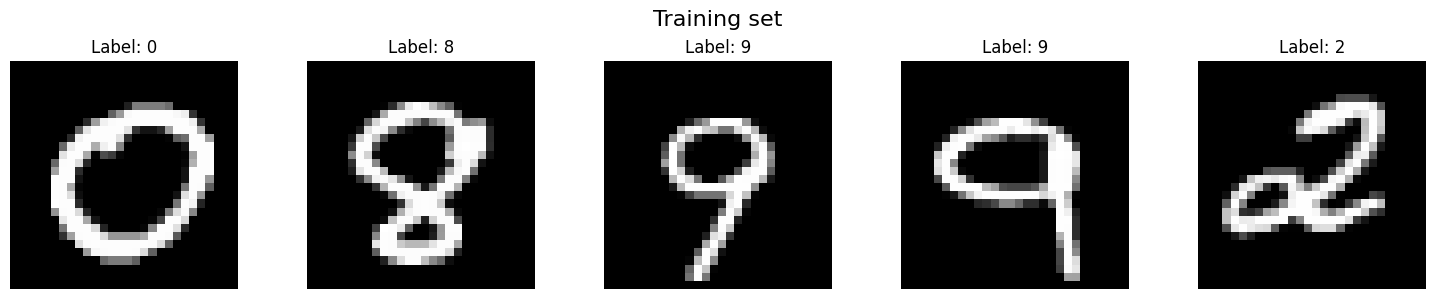

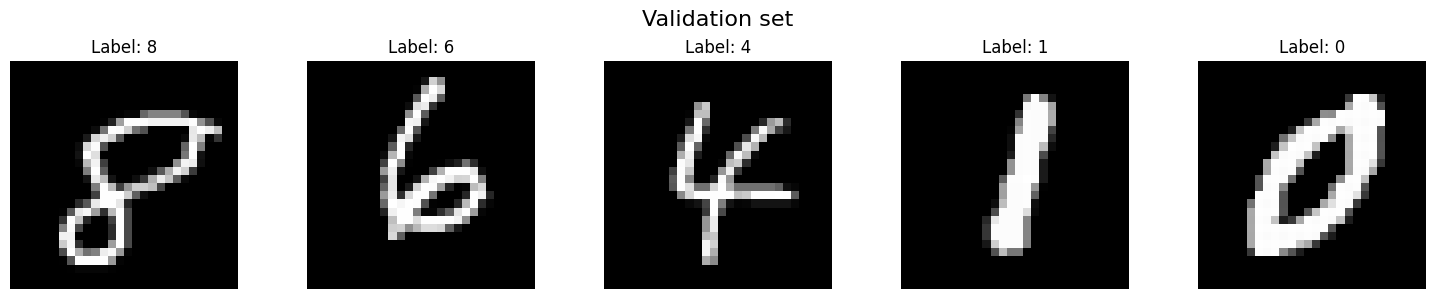

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_samples(loader, title):
    images, labels = next(iter(loader))
    images = images[:5]
    labels = labels[:5]
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(title, fontsize=16)
    
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = images[i].squeeze()
        plt.imshow(img.numpy(), cmap='gray' if img.dim() == 2 else None)
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 可視化訓練集樣本
visualize_samples(train_loader, "Training set")

# 可視化驗證集樣本
visualize_samples(val_loader, "Validation set")

### 小題 2：構建 CNN 模型 (15 分)

定義一個簡單的 CNN 模型，滿足以下條件：

1. 至少包含兩個卷積層 (`nn.Conv2d`) (2分)
2. 至少包含兩個池化層 (`nn.MaxPool2d`) (2分)
3. 使用激活函數 (`nn.ReLU`, `nn.Sigmoid`, `nn.Tanh`, `nn.ELU`, `nn.LeakyReLU`, `nn.PreLU` 等) (2分)
4. 定義輸出層，輸出一個 10 維向量 (對應 10 個類別) (2分)
5. 定義前向傳播，將以上所有網絡層連接（7分）


In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # 使用更多通道和更深的层次
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(128 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(128, 10)
        )
        
    def forward(self, x):
        #x = x.view(batch_size, channels, height, width)
        x = x.view(-1, 1, 28, 28)
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x      
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
print(model)

CNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_m

In [7]:
# 以下代碼執行後可以判斷你的作答是否正確，請勿修改

task_grader.q2_check(model)

Q2.1通過 (2分)
Q2.2通過 (2分)
Q2.3通過 (2分)
Q2.4通過 (2分)
Q2.5未通過: 未能成功定義前向傳播，輸出分類結果


### 小題 3：訓練模型 (20 分)

1. 選擇損失函數 (`MSELoss`, `CrossEntropyLoss` 等) (2分)
2. 選擇優化器（`SGD`, `Adam` 等），並設置學習率。 (3分)
3. 模型訓練**至少** 5 個 epoch，並在每個 epoch 結束時分別打印訓練集和驗證集的損失函數和準確率。 (15分)


In [8]:
from sklearn.metrics import accuracy_score

# 選擇損失函數
criterion = nn.CrossEntropyLoss()

# 選擇優化器
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# 訓練循環
for epoch in range(100):
    model.train()
    for batch_idx, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        preds = outputs.argmax(dim=1)
        train_loss = loss.item()
        train_acc = accuracy_score(labels.cpu().numpy(), preds.cpu().numpy())

        # 以下是記錄損失函數和準確率的代碼，不用修改
        if batch_idx % 100 == 0:
            train_losses.append(train_loss)
            train_accs.append(train_acc)
            print(f"Epoch {epoch+1}, Batch {batch_idx}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc * 100:.2f}%")

    model.eval()

    val_preds, val_true = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)

            val_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            val_true.extend(labels.numpy())

    val_loss = criterion(outputs.cpu(), labels).item()
    val_acc = accuracy_score(val_true, val_preds)

    # 以下是記錄損失函數和準確率的代碼，不用修改
    val_accs.append(val_acc)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1, Batch 0, Train Loss: 2.3208, Train Accuracy: 17.97%
Epoch 1, Batch 100, Train Loss: 1.1652, Train Accuracy: 76.56%
Epoch 1, Batch 200, Train Loss: 0.6658, Train Accuracy: 92.19%
Epoch 1, Batch 300, Train Loss: 0.4973, Train Accuracy: 93.75%
Epoch 1, Batch 400, Train Loss: 0.4243, Train Accuracy: 92.19%
Epoch 1, Val Loss: 0.1564, Val Accuracy: 97.12%
Epoch 2, Batch 0, Train Loss: 0.3008, Train Accuracy: 96.09%
Epoch 2, Batch 100, Train Loss: 0.3194, Train Accuracy: 96.09%
Epoch 2, Batch 200, Train Loss: 0.2380, Train Accuracy: 94.53%
Epoch 2, Batch 300, Train Loss: 0.1876, Train Accuracy: 97.66%
Epoch 2, Batch 400, Train Loss: 0.1139, Train Accuracy: 99.22%
Epoch 2, Val Loss: 0.0511, Val Accuracy: 98.55%
Epoch 3, Batch 0, Train Loss: 0.1314, Train Accuracy: 99.22%
Epoch 3, Batch 100, Train Loss: 0.1351, Train Accuracy: 97.66%
Epoch 3, Batch 200, Train Loss: 0.0825, Train Accuracy: 99.22%
Epoch 3, Batch 300, Train Loss: 0.1347, Train Accuracy: 97.66%
Epoch 3, Batch 400, Train Lo

KeyboardInterrupt: 

In [ ]:
# 以下代碼執行後可以判斷你的作答是否正確，請勿修改

task_grader.q3_1_check(criterion, optimizer)
task_grader.q3_2_check(train_losses, val_losses, train_accs, val_accs)

### 可視化

以下是一段將數據集進行可視化的代碼，如果前面的代碼編寫正確，會顯示一行圖片，並顯示模型識別出該圖片是哪一個數字

In [ ]:
def visualize_predictions(loader, model, title):
    images, true_labels = next(iter(loader))
    images = images.to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(images)
        pred_probs = torch.softmax(outputs, dim=1)
        pred_labels = outputs.argmax(dim=1)
    
    images = images[:20].cpu()
    true_labels = true_labels[:20]
    pred_labels = pred_labels[:20].cpu()
    pred_probs = pred_probs[:20].cpu()
    
    plt.figure(figsize=(15, 3))
    plt.suptitle(title, fontsize=16)
    
    for i in range(20):
        plt.subplot(1, 20, i+1)
        img = images[i].squeeze()
        
        plt.imshow(img.numpy(), cmap='gray' if img.dim() == 2 else None)
        pred_prob = pred_probs[i][pred_labels[i]].item()
        plt.title(f"Prediction: {pred_labels[i].item()}, Answer: {true_labels[i].item()}", 
                 color='green' if pred_labels[i].item() == true_labels[i].item() else 'red')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_predictions(val_loader, model, "Predictions")

### 提交

以下代碼會生成一個 `submission.csv`，選手只需要在右側菜單中選擇 `Submit to competition > Submit` 就可以完成提交

In [ ]:
import torch
import pandas as pd

test_images = torch.load('/kaggle/input/moai-2025-training/test_images.pt', weights_only=True)
# TODO: 按照前面的方法歸一化
test_images = test_images/255.0

model.eval()
with torch.no_grad():
    test_images = test_images.to(device)
    outputs = model(test_images)
    predictions = outputs.argmax(dim=1)

df_test = pd.DataFrame({"label": predictions.cpu().numpy()})
df_test.to_csv("submission2.csv", index_label="id")